In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from os import listdir, path

In [2]:
# video length in seconds
upperbound = 1255

In [3]:
# organize the data by folder - all the files for one plot
# should be in one folder
folder = 'data_exp_42502-v4'
dfs = []
for file in listdir(folder):
    if not file.endswith('.csv'):
        continue
    df = pd.read_csv(path.join(folder, file))
    dfs.append(df)

In [4]:
# write a docstring here
def clean(df):
    df1 = df[['Trial Number', 'Zone Name', 'Reaction Time', 'Response']]
    for i in range(1, len(df1['Response'])):
        if pd.isnull(df1['Response'][i]):
            df1['Response'][i] = 0
        
    # getting rid of non-slider rows 
    dropped = []
    for i in range(len(df1)):
        if df1['Zone Name'][i] != 'slider' or pd.isnull(df1['Reaction Time'][i]):
            #print(f'{i} row')
            dropped.append(i)
            df1 = df1.drop(labels=i)
    
    adder = 0
    for i in range(len(df)):
        if i in dropped:
            continue
        #print(adder)
        df1['Reaction Time'][i] += adder
        j = i + 1
        while j != len(df) - 1 and j in dropped:
            j += 1

        if j not in dropped and df1['Trial Number'][i] != df1['Trial Number'][j]:
            adder = df1['Reaction Time'][i]
    
    for i in range(len(df)):
        if i in dropped:
            continue
        df1['Reaction Time'][i] /= 1000
    
    # reindexing
    reaction_times = []
    responses = []
    for i in range(len(df)):
        if i in dropped:
            continue
        reaction_times.append(df1['Reaction Time'][i])
        responses.append(df1['Response'][i])
    
    data = {'Reaction Time': reaction_times,
           'Response': responses}
    df1 = pd.DataFrame(data)
    
    return df1

In [5]:
clean_dfs = []
for df in dfs:
    df1 = clean(df)
    clean_dfs.append(df1)

C:\Users\snigd\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\snigd\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\snigd\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\snigd\an

In [7]:
clean_dfs[0]

,Reaction Time,Response
0,0.000000,0.0
1,19.579411,12.0
2,23.568452,29.0
3,24.083703,49.0
4,29.585256,56.0
...,...,...
230,1238.480089,55.0
231,1238.978761,26.0
232,1239.477393,0.0
233,1251.976261,22.0


In [60]:
clean_dfs[2]

,Reaction Time,Response
0,0.000000,0.0
1,133.661600,1.0
2,141.995600,8.0
3,150.329600,11.0
4,242.003600,20.0
...,...,...
145,20320.590500,30.0
146,20345.592500,44.0
147,20920.519550,50.0
148,20928.853550,58.0


In [30]:
modified_dfs = []
# upperbound should be the maximum length of the video
for k in range(len(clean_dfs)):
    list_of_zeros = [0] * (int(upperbound))
    data = {'Reaction Time': range(0, int(upperbound)),
           'Response':  list_of_zeros}
    df2 = pd.DataFrame(data)
    
    j = 0
    for i in range(len(clean_dfs[k]) - 1):
        while j < upperbound and df2['Reaction Time'][j] <= clean_dfs[k]['Reaction Time'][i + 1]:
            df2['Response'][j] = clean_dfs[k]['Response'][i]
            j += 1
    modified_dfs.append(df2)

61

In [36]:
all_reaction_times = []
all_responses = []
for df in modified_dfs:
    for i in range(len(df)):
        all_reaction_times.append(df['Reaction Time'][i])
        all_responses.append(df['Response'][i])

In [37]:
data = {'Reaction Time': all_reaction_times,
       'Response': all_responses}

In [38]:
final_df = pd.DataFrame(data)

<AxesSubplot:xlabel='Reaction Time', ylabel='Response'>

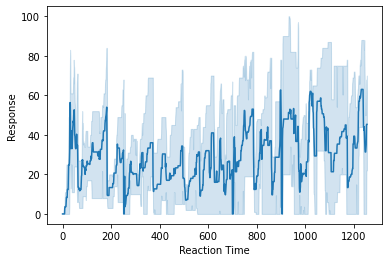

In [39]:
sns.lineplot(data=final_df, x='Reaction Time',
    y='Response')

In [ ]:
# turn this into a script with comments
# average for every time point - save as .csv
# histogram of end Reaction Times of each trial 

In [40]:
list_of_zeros = [0] * (int(upperbound))
data = {'Reaction Time': range(0, int(upperbound)),
           'Response':  list_of_zeros}
avg_df = pd.DataFrame(data)

In [45]:
for i in range(upperbound):
    response_sum = 0
    for df in modified_dfs:
        response_sum += df['Response'][i]
    avg_df['Response'][i] = response_sum * 1.0 / len(modified_dfs)

In [46]:
avg_df.to_csv(r'average_responses.csv')

In [47]:
avg_df

,Reaction Time,Response
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1250,1250,33
1251,1251,35
1252,1252,44
1253,1253,45
